ข้อมูลตัวอย่าง:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

ข้อมูลสรุป:
<class 'pandas.core.frame.DataFrame'>
RangeInd

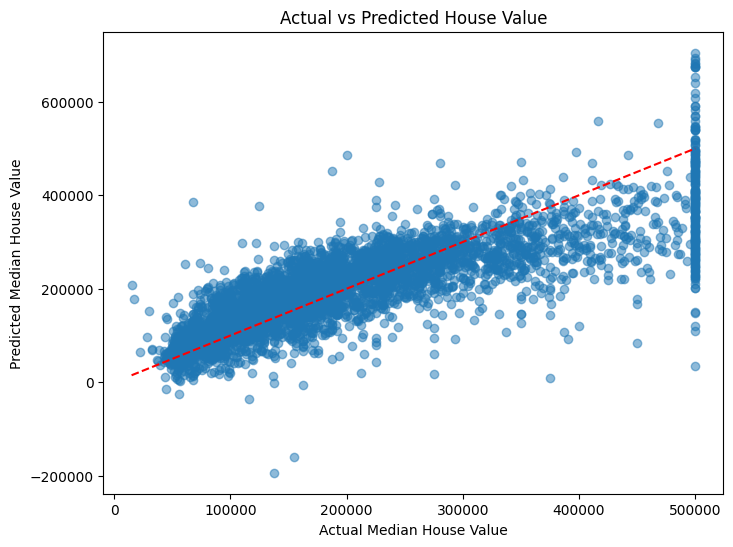

In [2]:
# Import libraries ที่จำเป็น
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. โหลดไฟล์ CSV (housing.csv)
# โดยที่ไฟล์ housing.csv อยู่ในโฟลเดอร์ /mnt/data/ (ใน Colab ที่อัปโหลดไฟล์)
df = pd.read_csv('/content/housing.csv')
print("ข้อมูลตัวอย่าง:")
print(df.head())
print("\nข้อมูลสรุป:")
print(df.info())
print("\nสถิติพื้นฐาน:")
print(df.describe())

# 2. Data Preparation
# หากมีคอลัมน์ที่เป็นข้อมูลประเภท categorical เช่น 'ocean_proximity'
if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
    print("\nหลังจากทำ One-Hot Encoding สำหรับ 'ocean_proximity':")
    print(df.head())

# เติมค่า missing ด้วยค่าเฉลี่ย (สำหรับคอลัมน์ตัวเลข)
df.fillna(df.mean(), inplace=True)

# 3. กำหนด Feature และ Target
# สมมติว่า target คือ 'median_house_value'
target = 'median_house_value'
features = df.columns.drop(target)

X = df[features]
y = df[target]

# 4. แบ่งข้อมูลเป็นชุด Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. สร้างโมเดล Linear Regression และเทรนโมเดล
model = LinearRegression()
model.fit(X_train, y_train)

# 6. ทำนายผลลัพธ์ด้วยชุด Test
y_pred = model.predict(X_test)

# 7. ประเมินผลโมเดลด้วย Mean Squared Error, RMSE และ R2 Score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nผลการประเมินโมเดล:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

# 8. Plot กราฟเปรียบเทียบค่า Actual กับ Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Value")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # เส้น y = x
plt.show()


Gradient Boosting Regressor Results:
MSE: 3132230634.2692103
RMSE: 55966.33482969213
R2 Score: 0.7609730483933395


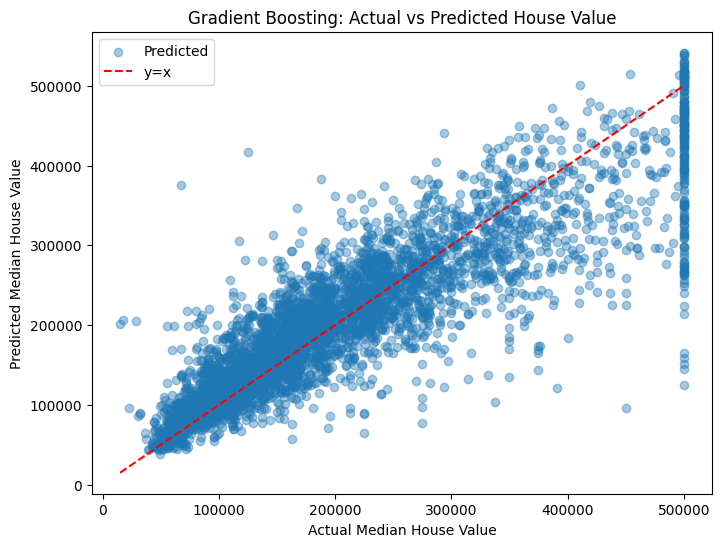

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. โหลดไฟล์ CSV
df = pd.read_csv('/content/housing.csv')  # แก้ path ตามจริง

# 2. One-Hot Encoding คอลัมน์ 'ocean_proximity' (ถ้ามี)
if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# 3. จัดการ Missing Values (ถ้ามี)
df.fillna(df.mean(), inplace=True)

# 4. กำหนด Feature และ Target
target = 'median_house_value'
features = df.columns.drop(target)

X = df[features]
y = df[target]

# 5. แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. สร้างโมเดล Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(
    n_estimators=100,      # จำนวนต้นไม้ย่อย
    learning_rate=0.1,     # อัตราการเรียนรู้
    max_depth=3,           # ความลึกของต้นไม้
    random_state=42
)

# 7. ฝึกโมเดล (Training)
gbr_model.fit(X_train, y_train)

# 8. ทำนายบนชุด Test
y_pred = gbr_model.predict(X_test)

# 9. ประเมินผลด้วย MSE, RMSE และ R2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor Results:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# 10. แสดงกราฟ Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='y=x')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Gradient Boosting: Actual vs Predicted House Value")
plt.legend()
plt.show()
